## SETUP

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone

In [ ]:
%cd yolov5
%pip install -qr requirements.txt  # install

In [5]:
import torch
import utils
display = utils.notebook_init()  # checks

YOLOv3 🚀 v9.6.0-7-g0519223 torch 1.8.0 CUDA:0 (Quadro RTX 6000, 24198MiB)


Setup complete ✅


## Detect

detect: weights=['runs/train/exp98/weights/best.pt'], source=data/bccd_demo, imgsz=[500, 500], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-7-g0519223 torch 1.8.0 CUDA:0 (Quadro RTX 6000, 24198MiB)

Fusing layers... 
Model Summary: 367 layers, 46119048 parameters, 0 gradients, 107.8 GFLOPs
image 1/2 /l/users/20020073/Deep_learning/YOLOV3/yolov3/data/bccd_demo/test1.jpg: 512x512 2 Plateletss, 30 RBCs, 1 WBC, Done. (0.011s)
image 2/2 /l/users/20020073/Deep_learning/YOLOV3/yolov3/data/bccd_demo/test2.jpg: 512x512 5 Plateletss, 23 RBCs, 2 WBCs, Done. (0.013s)
Speed: 0.4ms pre-process, 11.8ms inference, 1.6ms NMS per image at shape (1, 3, 512, 512)
Results saved to runs/detect/exp4


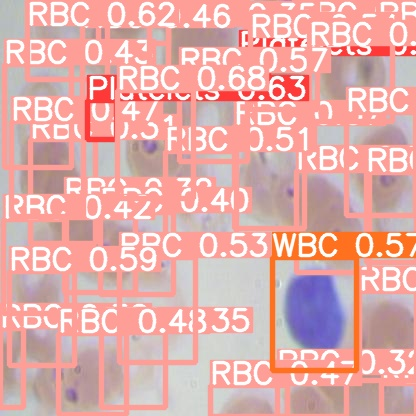

In [9]:
!python detect.py --weights runs/train/exp98/weights/best.pt  --img 500 --conf 0.25 --source data/bccd_demo
display.Image(filename='runs/detect/exp4/test1.jpg', width=500)
# display.Image(filename='data/bccd_demo/test1.jpg', width=500)  original test image

## Evaluate

In [1]:
!python val.py  --img 500 --batch 16 --data bccd.yaml --weights runs/train/exp98/weights/best.pt  --task 'test'

val: data=/l/users/20020073/Deep_learning/YOLOV3/yolov3/data/bccd.yaml, weights=['runs/train/exp98/weights/best.pt'], batch_size=16, imgsz=500, conf_thres=0.001, iou_thres=0.6, task=test, device=, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-7-g0519223 torch 1.8.0 CUDA:0 (Quadro RTX 6000, 24198MiB)

Fusing layers... 
Model Summary: 367 layers, 46119048 parameters, 0 gradients, 107.8 GFLOPs
test: Scanning '../datasets/BloodCell-Detection-Datatset/test/labels.cache' imag
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         36        471      0.849      0.908      0.918      0.601
           Platelets         36         36      0.824      0.917      0.895       0.43
                 RBC         36        398      0.767      0.834      0.876      0.604
                 WBC         3

## TRAIN

In [ ]:
!python train.py --img 500 --batch 16  --data bccd.yaml --weights yolov5m6.pt --cfg models/yolov5l.yaml --hyp data/hyps/hyp.aug.yaml